In [1]:
from torchvision import models
from torch.autograd import Variable
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from torch import nn
import torch

In [2]:
resnet = models.resnet50(pretrained=True).cuda()

In [3]:
weights = resnet.conv1.weight

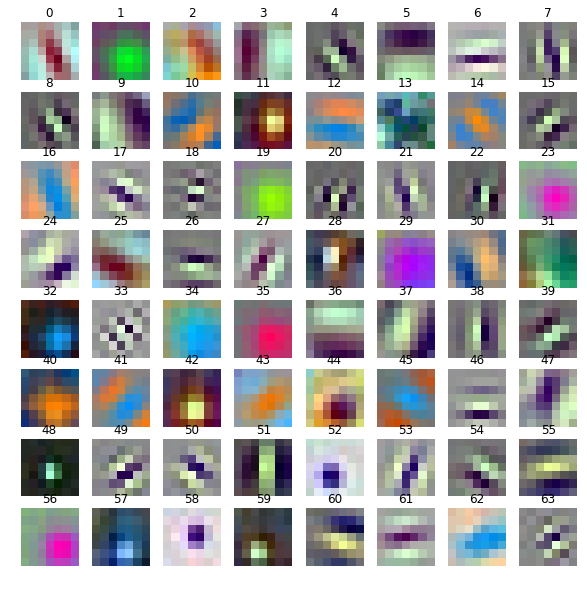

In [4]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    n = weights[i].transpose(0,2).data.cpu().numpy()
#     n = (n*(256/2)+(256/2)).astype(int)

    n = (n-n.min())
    n = n/n.max()*255
    n = n.astype(int)
    
    plt.imshow(n)
    plt.title(str(i))
    plt.axis('off')

In [13]:
from util import preprocess_image, recreate_image
def get_blank_img():
    return preprocess_image(np.random.randn(16,16, 3))

In [14]:
childs = list(resnet.children())

In [15]:
to_conv = resnet.conv1

In [16]:
from scipy.ndimage.filters import gaussian_filter

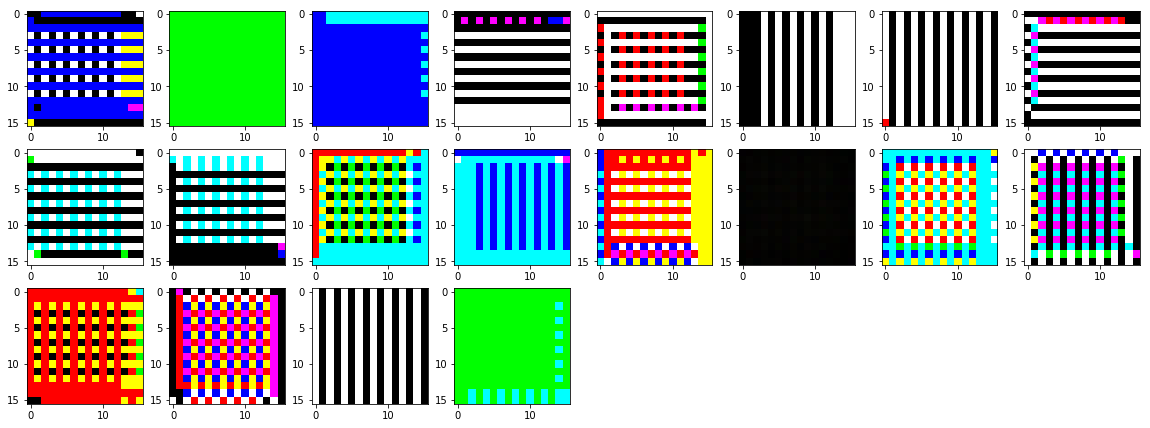

In [29]:
plt.figure(figsize=(20,20))
for j in range(20):
    plt.subplot(8,8,j+1)
    img = get_blank_img()
    optimizer = torch.optim.Adam([img], lr=10)
    filt = j
    eps = 1e-8
    for i in range(20):    
        optimizer.zero_grad()
        res = to_conv(img)[0,filt]
        objective = -res.mean() 
        objective.backward()
#         img.grad /= img.grad.std() + eps
#         img.data -= img.grad.data
        optimizer.step()
        img = blur(img, 0.1, 0.1)
    plt.imshow(recreate_image(img))

In [11]:
def blur(img, sigma, c_sigma):
    out = recreate_image(img)
    out = gaussian_filter(out, [sigma, sigma, c_sigma])
#     out = cv2.bilateralFilter(out, 9, sigma, sigma)
    return preprocess_image(out)

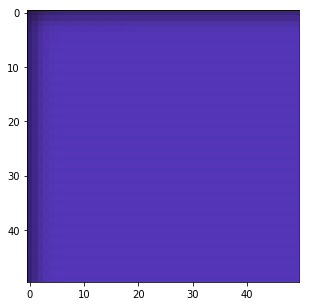